In [1]:
import pandas as pd

df = pd.read_pickle('~/PropagandaDetection/pickled/train_set_FLC.pkl')

In [2]:
df.head(100)

,article_id,start_index,end_index,full_sentence,target_sentence,technique
0,780619695,1538,1554,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Supremacists Who,Repetition
1,780619695,1728,1744,"Francis and Farrell’s 'Sinod' on the Youth, #S...","uke video, within",Repetition
2,780619695,2018,2034,"Francis and Farrell’s 'Sinod' on the Youth, #S...",tion League (ADL),Repetition
3,780619695,2245,2261,"Francis and Farrell’s 'Sinod' on the Youth, #S...",ideo.\nDavid Duke’,Repetition
4,780619695,2838,2854,"Francis and Farrell’s 'Sinod' on the Youth, #S...",enemy of the rig,Repetition
...,...,...,...,...,...,...
95,759478604,9832,9859,A Sister Speaks: ‘Cor Orans is the Death-Knell...,that a notice about the pen,Loaded_Language
96,759478604,10856,10866,A Sister Speaks: ‘Cor Orans is the Death-Knell...,n this trag,Loaded_Language
97,759478604,10752,10759,A Sister Speaks: ‘Cor Orans is the Death-Knell...,Apostol,Loaded_Language
98,759478604,12559,12579,A Sister Speaks: ‘Cor Orans is the Death-Knell...,to elevate far-Left b,Loaded_Language


In [3]:
df2 = df.drop('target_sentence', axis=1)
df2.head(100)

,article_id,start_index,end_index,full_sentence,technique
0,780619695,1538,1554,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition
1,780619695,1728,1744,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition
2,780619695,2018,2034,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition
3,780619695,2245,2261,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition
4,780619695,2838,2854,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition
...,...,...,...,...,...
95,759478604,9832,9859,A Sister Speaks: ‘Cor Orans is the Death-Knell...,Loaded_Language
96,759478604,10856,10866,A Sister Speaks: ‘Cor Orans is the Death-Knell...,Loaded_Language
97,759478604,10752,10759,A Sister Speaks: ‘Cor Orans is the Death-Knell...,Loaded_Language
98,759478604,12559,12579,A Sister Speaks: ‘Cor Orans is the Death-Knell...,Loaded_Language


In [4]:
import os

def list_files(directory):
    """Lists files in a given directory."""
    try:
        for filename in os.listdir(directory):
            print(filename)
    except FileNotFoundError:
        print(f"Directory not found: {directory}")

if __name__ == "__main__":
    list_files("/Users/raylesser/PropagandaDetection/datasets/train-articles/")  


article701225819.txt
article754131438.txt
article7618745059.txt
article782086447.txt
article710376094.txt
article754179642.txt
article757243988.txt
article729303442.txt
article761969038.txt
article999001188.txt
article729581752.txt
article761564397.txt
article756114837.txt
article764664283.txt
article736231219.txt
article711964584.txt
article696694316.txt
article790677230.txt
article729561658.txt
article789370998.txt
article999000136.txt
article771546417.txt
article698018235.txt
article788173482.txt
article703806098.txt
article999000849.txt
article697959084.txt
article703698295.txt
article724095467.txt
article776368676.txt
article7634408719.txt
article795689901.txt
article728169864.txt
article781847297.txt
article793467906.txt
article776616374.txt
article795079843.txt
article771406408.txt
article765982381.txt
article7651970399.txt
article735815173.txt
article728343601.txt
article781768042.txt
article999000135.txt
article732154721.txt
article769682854.txt
article999000125.txt
article999

In [5]:
import os

if __name__ == "__main__":
    print(f"Current working directory: {os.getcwd()}")
    list_files("/Users/raylesser/PropagandaDetection/datasets") # Replace your_folder_name


Current working directory: /Users/raylesser/PropagandaDetection/data
slcarticlesdev
.DS_Store
train-labels-SLC
train-labels-FLC
train-articles
dev-articles
slclabelsdev
dev-template-output-SLC


In [6]:
import pandas as pd
import os

folder_path = '/Users/raylesser/PropagandaDetection/datasets/train-articles/'

# Function to extract text from a file based on start and end indices
def extract_text_from_file(row):
    article_id = row['article_id']
    start = row['start_index']
    end = row['end_index']
    
    # Construct the file path based on the article ID
    file_path = os.path.join(folder_path, f'article{article_id}.txt')
    
    try:
        # Open the text file and read its content
        with open(file_path, 'r') as file:
            text = file.read()
            # Extract the substring from start to end index
            return text[start:end]
    except FileNotFoundError:
        print(f"File for article ID {article_id} not found.")
        return None
    except Exception as e:
        print(f"Error processing file for article ID {article_id}: {e}")
        return None

# Apply the function to each row and add the extracted text as a new column
df3 = df2.copy()
df3['extracted_text'] = df2.apply(extract_text_from_file, axis=1)

display(df3.head(100))


,article_id,start_index,end_index,full_sentence,technique,extracted_text
0,780619695,1538,1554,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition,How inconvenient
1,780619695,1728,1744,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition,How inconvenient
2,780619695,2018,2034,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition,How inconvenient
3,780619695,2245,2261,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition,How inconvenient
4,780619695,2838,2854,"Francis and Farrell’s 'Sinod' on the Youth, #S...",Repetition,How inconvenient
...,...,...,...,...,...,...
95,759478604,9832,9859,A Sister Speaks: ‘Cor Orans is the Death-Knell...,Loaded_Language,complete loss of our rights
96,759478604,10856,10866,A Sister Speaks: ‘Cor Orans is the Death-Knell...,Loaded_Language,ridiculous
97,759478604,10752,10759,A Sister Speaks: ‘Cor Orans is the Death-Knell...,Loaded_Language,million
98,759478604,12559,12579,A Sister Speaks: ‘Cor Orans is the Death-Knell...,Loaded_Language,would not rest until


In [7]:
df4 = df3.rename(columns={'full_sentence': 'article_text', 'extracted_text': 'target_text'})
df4 = df4[['article_id', 'start_index', 'end_index', 'article_text', 'target_text', 'technique']]

display(df4.head(100))

,article_id,start_index,end_index,article_text,target_text,technique
0,780619695,1538,1554,"Francis and Farrell’s 'Sinod' on the Youth, #S...",How inconvenient,Repetition
1,780619695,1728,1744,"Francis and Farrell’s 'Sinod' on the Youth, #S...",How inconvenient,Repetition
2,780619695,2018,2034,"Francis and Farrell’s 'Sinod' on the Youth, #S...",How inconvenient,Repetition
3,780619695,2245,2261,"Francis and Farrell’s 'Sinod' on the Youth, #S...",How inconvenient,Repetition
4,780619695,2838,2854,"Francis and Farrell’s 'Sinod' on the Youth, #S...",How inconvenient,Repetition
...,...,...,...,...,...,...
95,759478604,9832,9859,A Sister Speaks: ‘Cor Orans is the Death-Knell...,complete loss of our rights,Loaded_Language
96,759478604,10856,10866,A Sister Speaks: ‘Cor Orans is the Death-Knell...,ridiculous,Loaded_Language
97,759478604,10752,10759,A Sister Speaks: ‘Cor Orans is the Death-Knell...,million,Loaded_Language
98,759478604,12559,12579,A Sister Speaks: ‘Cor Orans is the Death-Knell...,would not rest until,Loaded_Language


In [8]:
print(df4[df4['target_text'].isna() | (df4['target_text'] == '')])
df4 = df4.drop(1266).reset_index(drop=True)


     article_id  start_index  end_index  \
1266  776368676         4187       4225   

                                           article_text target_text  \
1266  Trump To Sessions In Series Of Tweets: ‘Stop T...               

            technique  
1266  Loaded_Language  


In [9]:
display(df4['article_text'][0])

"Francis and Farrell’s 'Sinod' on the Youth, #StopThe Synod2018\n\nDuring the last 5 years of this papacy, Francis and his Synodal Schemers masterfully manipulated, rigged, and exploited the synodal process.\nThe backdoor tactics and machinations were brilliantly documented by Edward Pentin , Henry Sire, George Neumayr and an array of investigative journalists.\nThe fool doth think he is wise, but the wise man knows himself to be a fool.\n– Shakespeare, As You Like It Pope Francis and Cardinal Farrell sit with students at the 2018 pre-synodal meeting for young people.\nThe upcoming October 2018 Synod of Bishops guarantees more synodal antics as the doctrinal culmination of the “Who Am I to Judge” mantra and the recantation of Church teaching on homosexuality.\nPope Francis announced in the Pre-Synodal meeting that the Church will be listening to all the young people and that “no one will be excluded.” That’s code language that the Pope will be “dialoging” and “accompanying” and “hearin

In [10]:
display(df4['technique'].unique())

array(['Repetition', 'Slogans', 'Loaded_Language',
       'Exaggeration,Minimisation', 'Name_Calling,Labeling',
       'Appeal_to_fear-prejudice', 'Reductio_ad_hitlerum', 'Doubt',
       'Appeal_to_Authority', 'Black-and-White_Fallacy', 'Flag-Waving',
       'Causal_Oversimplification', 'Whataboutism',
       'Thought-terminating_Cliches',
       'Obfuscation,Intentional_Vagueness,Confusion', 'Bandwagon',
       'Red_Herring', 'Straw_Men'], dtype=object)

In [11]:
df4['technique'] = df4['technique'].apply(lambda x: 'Whataboutism,straw man,red herring' 
                                      if x in ['Whataboutism', 'Straw_Men', 'Red_Herring']
                                      else x)

df4['technique'] = df4['technique'].apply(lambda x: 'Bandwagon,reductio ad hitlerum' 
                                      if x in ['Bandwagon', 'Reductio_ad_hitlerum']
                                      else x)

df4 = df4[df4['technique'] != 'Obfuscation,Intentional_Vagueness,Confusion']



In [12]:
display(df4['technique'].unique())
df5 = df4.copy()
df5 = df5[df5['technique'] != 'Repetition']

display(df5['technique'].unique())


array(['Repetition', 'Slogans', 'Loaded_Language',
       'Exaggeration,Minimisation', 'Name_Calling,Labeling',
       'Appeal_to_fear-prejudice', 'Bandwagon,reductio ad hitlerum',
       'Doubt', 'Appeal_to_Authority', 'Black-and-White_Fallacy',
       'Flag-Waving', 'Causal_Oversimplification',
       'Whataboutism,straw man,red herring',
       'Thought-terminating_Cliches'], dtype=object)

array(['Slogans', 'Loaded_Language', 'Exaggeration,Minimisation',
       'Name_Calling,Labeling', 'Appeal_to_fear-prejudice',
       'Bandwagon,reductio ad hitlerum', 'Doubt', 'Appeal_to_Authority',
       'Black-and-White_Fallacy', 'Flag-Waving',
       'Causal_Oversimplification', 'Whataboutism,straw man,red herring',
       'Thought-terminating_Cliches'], dtype=object)

In [13]:
df5.to_csv('diss_data_correct.csv')

In [14]:
df6 = df5.copy()
df6['sentence_length'] = df6['target_text'].str.len()

display(df6.head(100))

,article_id,start_index,end_index,article_text,target_text,technique,sentence_length
6,780619695,44,62,"Francis and Farrell’s 'Sinod' on the Youth, #S...",#StopThe Synod2018,Slogans,18
7,780619695,3735,3740,"Francis and Farrell’s 'Sinod' on the Youth, #S...",dirty,Loaded_Language,5
8,780619695,6301,6314,"Francis and Farrell’s 'Sinod' on the Youth, #S...",#StopTheSynod,Slogans,13
10,780619695,1935,1959,"Francis and Farrell’s 'Sinod' on the Youth, #S...",intrinsically disordered,Loaded_Language,24
11,780619695,4123,4129,"Francis and Farrell’s 'Sinod' on the Youth, #S...",sordid,Loaded_Language,6
...,...,...,...,...,...,...,...
111,765953146,5320,5335,"'Textbook Definition of Bias'\n\nOn Monday, DO...",deep state plot,Loaded_Language,15
113,701939679,234,337,Virginia: Muslim gets 20 years for joining ISI...,Imagine spending all that time studying Islam ...,Doubt,103
114,701939679,361,375,Virginia: Muslim gets 20 years for joining ISI...,learned imams,"Name_Calling,Labeling",14
115,701939679,339,529,Virginia: Muslim gets 20 years for joining ISI...,We can only hope that learned imams such as Po...,Doubt,190


In [15]:
df_final = df6.copy()
display(df_final.head())

,article_id,start_index,end_index,article_text,target_text,technique
6,780619695,44,62,"Francis and Farrell’s 'Sinod' on the Youth, #S...",#StopThe Synod2018,Slogans
7,780619695,3735,3740,"Francis and Farrell’s 'Sinod' on the Youth, #S...",dirty,Loaded_Language
8,780619695,6301,6314,"Francis and Farrell’s 'Sinod' on the Youth, #S...",#StopTheSynod,Slogans
10,780619695,1935,1959,"Francis and Farrell’s 'Sinod' on the Youth, #S...",intrinsically disordered,Loaded_Language
11,780619695,4123,4129,"Francis and Farrell’s 'Sinod' on the Youth, #S...",sordid,Loaded_Language


In [16]:
df_final.technique.unique() # Classes to predict

array(['Slogans', 'Loaded_Language', 'Exaggeration,Minimisation',
       'Name_Calling,Labeling', 'Appeal_to_fear-prejudice',
       'Bandwagon,reductio ad hitlerum', 'Doubt', 'Appeal_to_Authority',
       'Black-and-White_Fallacy', 'Flag-Waving',
       'Causal_Oversimplification', 'Whataboutism,straw man,red herring',
       'Thought-terminating_Cliches'], dtype=object)

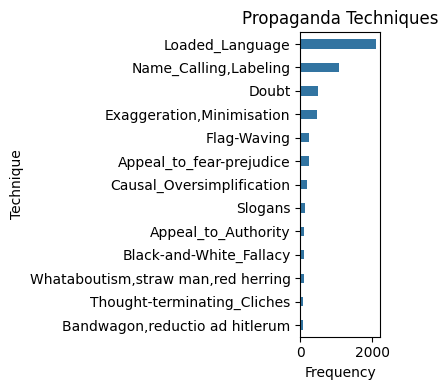

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each technique
technique_counts = df_final['technique'].value_counts()

# Create a compact vertical bar chart with skinny bars
plt.figure(figsize=(4, 4))
sns.barplot(y=technique_counts.index, x=technique_counts.values, width=0.4)
plt.title('Propaganda Techniques')
plt.ylabel('Technique')
plt.xlabel('Frequency')
plt.tight_layout()


In [18]:
SLC_df = pd.read_pickle('/Users/raylesser/PropagandaDetection/pickled/train_set_SLC.pkl')
display(SLC_df)

,article_id,line,is_propaganda,sentence
0,761874505,1,non-propaganda,[Ex-Sailor Pardoned By Trump Says He’s SUING O...
1,761874505,2,non-propaganda,NaN
2,761874505,3,non-propaganda,"[A former Navy sailor, who is one of five peop..."
3,761874505,4,non-propaganda,"[Kristian Saucier, who served a year in federa..."
4,761874505,5,non-propaganda,[Saucier said that he realizes he had erred in...
...,...,...,...,...
16960,694356862,29,non-propaganda,[As the U.S.-led coalition continues to drive ...
16961,694356862,30,non-propaganda,[National Security Adviser H.R.]
16962,694356862,31,propaganda,[McMaster said that the “so called liberation ...
16963,694356862,32,propaganda,[Whether the Trump administration follows thro...


Text(0, 0.5, '')

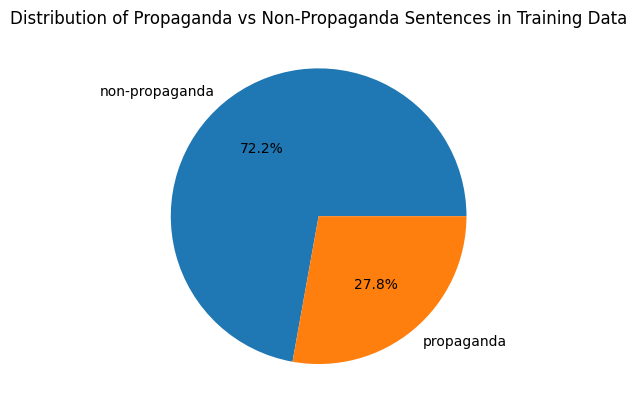

In [19]:
# Calculate value counts and create pie chart
SLC_df['is_propaganda'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Propaganda vs Non-Propaganda Sentences in Training Data')
plt.ylabel('') 